<a href="https://colab.research.google.com/github/Venky2708/MNIST-Classification-using-Resnet-34/blob/main/mnist%7Cresnet34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import datasets

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train = x_train.astype('float32')/255.0

In [ ]:
x_test = x_test.astype('float32')/255.0

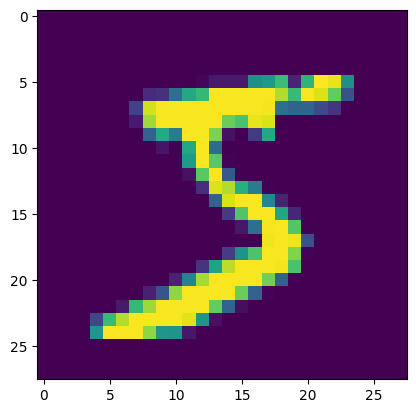

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [ ]:
x_train = tf.stack([x_train, x_train, x_train], axis=-1)
x_test = tf.stack([x_test, x_test, x_test], axis=-1)

In [ ]:
x_train.shape

TensorShape([60000, 28, 28, 3])

In [ ]:
from tensorflow.keras import utils

In [ ]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [ ]:
from tensorflow.keras import layers,models,losses,optimizers,metrics

In [ ]:
def residual_block(x, filters, kernel_size=3, stride=1, use_shortcut=True):
    # Shortcut
    shortcut = x
    if use_shortcut:
        shortcut = layers.Conv2D(filters, (1, 1), strides=stride, padding='same')(x)
        shortcut = layers.BatchNormalization()(shortcut)
    # Residual path
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Element-wise addition
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

def build_resnet34(input_shape=(28, 28, 3), num_classes=10):
    input_tensor = layers.Input(shape=input_shape)

    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    # Residual blocks
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = residual_block(x, 128)

    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)

    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)
    x = residual_block(x, 512)
    # Average pooling with pool size matching spatial dimensions
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Flatten()(x)
    # Fully connected layer
    x = layers.Dropout(rate=0.5)(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=input_tensor, outputs=x, name='resnet34')
    return model

In [ ]:
resnet34_model = build_resnet34()
resnet34_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'],run_eagerly=True)

In [ ]:
resnet34_model.summary()

Model: "resnet34"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 14, 14, 64)           9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 14, 14, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 14, 14, 64)           0         ['batch_normalization[0

In [ ]:
history = resnet34_model.fit(x_train,y_train, epochs=5,validation_data=(x_test,y_test))

1875/1875 [==============================] - 726s 374ms/step - loss: 0.3117 - accuracy: 0.9170 - val_loss: 0.1649 - val_accuracy: 0.9574
Epoch 2/5
1875/1875 [==============================] - 699s 373ms/step - loss: 0.1252 - accuracy: 0.9701 - val_loss: 0.1181 - val_accuracy: 0.9767
Epoch 3/5
1875/1875 [==============================] - 702s 374ms/step - loss: 0.1159 - accuracy: 0.9740 - val_loss: 0.1735 - val_accuracy: 0.9595
Epoch 4/5
1875/1875 [==============================] - 706s 377ms/step - loss: 0.1007 - accuracy: 0.9777 - val_loss: 0.2424 - val_accuracy: 0.9479
Epoch 5/5
1875/1875 [==============================] - 698s 372ms/step - loss: 0.0831 - accuracy: 0.9816 - val_loss: 0.0857 - val_accuracy: 0.9749


In [ ]:
test_loss, test_accuracy = resnet34_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

313/313 [==============================] - 42s 134ms/step - loss: 0.0857 - accuracy: 0.9749
Test Accuracy: 97.49%
Test Loss: 0.0857
